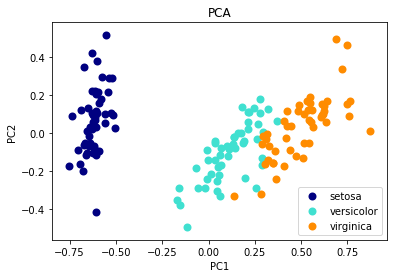

In [1]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import MinMaxScaler

iris = load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names

scaler = MinMaxScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

from sklearn import decomposition
pca = decomposition.PCA()
pca_transformed = pca.fit_transform(X_scaled)

def plot3clusters(X, title, vtitle):
    import matplotlib.pyplot as plt
    plt.figure()
    colors = ['navy', 'turquoise', 'darkorange']
    lw = 2

    for color, i, target_name in zip(colors, [0, 1, 2], target_names):
        plt.scatter(X[y == i, 0], X[y == i, 1], color=color, alpha=1., lw=lw, label=target_name)

    plt.legend(loc='best', shadow=False, scatterpoints=1)
    plt.title(title)  
    plt.xlabel(vtitle + "1")
    plt.ylabel(vtitle + "2")
    plt.savefig('pca_result.jpg')
    return(plt.show())
plot3clusters(pca_transformed[:,:2], 'PCA', 'PC') 



Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 4)]               0         
_________________________________________________________________
dense (Dense)                (None, 2)                 10        
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 12        
Total params: 22
Trainable params: 22
Non-trainable params: 0
_________________________________________________________________
None


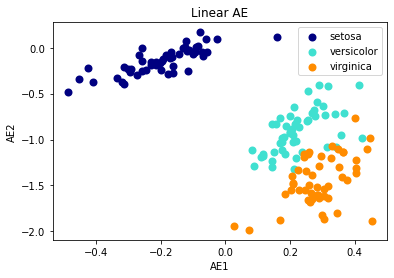

In [2]:

from keras.layers import Input, Dense
from keras.models import Model
import matplotlib.pyplot as plt

#create an AE and fit it with our data using 3 neurons in the dense layer using keras' functional API
input_dim = X_scaled.shape[1]
encoding_dim = 2  
input_img = Input(shape=(input_dim,))
encoded = Dense(encoding_dim, activation='linear')(input_img)
decoded = Dense(input_dim, activation='linear')(encoded)
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='mse')
print(autoencoder.summary())

history = autoencoder.fit(X_scaled, X_scaled,
                epochs=1000,
                batch_size=32,
                shuffle=True,
                validation_split=0.1,
                verbose = 0)

# use our encoded layer to encode the training input
encoder = Model(input_img, encoded)
encoded_input = Input(shape=(encoding_dim,))
decoder_layer = autoencoder.layers[-1]
decoder = Model(encoded_input, decoder_layer(encoded_input))
encoded_data = encoder.predict(X_scaled)

plot3clusters(encoded_data[:,:2], 'Linear AE', 'AE')